# EDA

In [1]:
# 데이터 시각화를 위한 
import os
from glob import glob
import random
import time
import datetime
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from keras.utils import np_utils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

2022-04-04 05:38:38.444539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/site-packages/cv2/../../lib64:
2022-04-04 05:38:38.444575: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
NUMBER_CLASSES = 11 # 11 classes
# 데이터 스플릿 및 정규화
img_rows = 64 # 이미지 차원
img_cols = 64
# color_type = 1 # gray
color_type = 3



# openCV로 이미지 읽기 + resize
def get_cv2_image(path, img_rows, img_cols, color_type=3):
    """
    해당하는 차원수(3 or 1)와 path에 있는 image를 opencv 읽어 반환하는 함수
    """
    if color_type == 1: # Grayscale로 로딩하기
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    elif color_type == 3: # 컬러 이미지로 로딩하기
        img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_rows, img_cols)) # 사이즈 줄이기
    return img


# 설정된 사이즈 만큼 사진 사이즈를 줄이고 Training dataset 로딩합니다.
def load_train(img_rows, img_cols, color_type=3):
    """
    Return train images and train labels from the original path
    """
    train_images = [] 
    train_labels = []
    # 클래스 폴더 만큼 루프를 돌아 train 이미지 파일과 라벨을 반환합니다.
    for classed in tqdm(range(NUMBER_CLASSES)):
        print('Loading directory c{}'.format(classed))
        files = glob(os.path.join('./imgs/train/c' + str(classed), '*.jpg'))
        for file in files:
            img = get_cv2_image(file, img_rows, img_cols, color_type)
            train_images.append(img)
            train_labels.append(classed)
    return train_images, train_labels

X, labels = load_train(img_rows, img_cols, color_type)
y = np_utils.to_categorical(labels, 11) #categorical train label



x_train, x_vali, y_train, y_vali = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,img_rows,img_cols,color_type)
x_test = np.array(x_vali, dtype=np.uint8).reshape(-1,img_rows,img_cols,color_type)

  0%|          | 0/11 [00:00<?, ?it/s]

Loading directory c0


  9%|▉         | 1/11 [00:07<01:13,  7.38s/it]

Loading directory c1


 18%|█▊        | 2/11 [00:14<01:03,  7.03s/it]

Loading directory c2


 27%|██▋       | 3/11 [00:21<00:55,  6.96s/it]

Loading directory c3


 36%|███▋      | 4/11 [00:27<00:48,  6.96s/it]

Loading directory c4


 45%|████▌     | 5/11 [00:34<00:41,  6.93s/it]

Loading directory c5


 55%|█████▍    | 6/11 [00:41<00:34,  6.91s/it]

Loading directory c6


 64%|██████▎   | 7/11 [00:48<00:27,  6.91s/it]

Loading directory c7


 73%|███████▎  | 8/11 [00:54<00:19,  6.62s/it]

Loading directory c8


 82%|████████▏ | 9/11 [01:00<00:12,  6.32s/it]

Loading directory c9


 91%|█████████ | 10/11 [01:06<00:06,  6.33s/it]

Loading directory c10


100%|██████████| 11/11 [01:17<00:00,  7.06s/it]


In [3]:
# 분석
# 이름 리스트 로드하기
names = [item[17:19] for item in sorted(glob("./imgs/train/*/"))]
test_files_size = len(np.array(glob(os.path.join('./imgs/test', '*.jpg'))))
x_train_size = len(x_train)
categories_size = len(names)
x_test_size = len(x_test)
print('There are %s total images.\n' % (test_files_size + x_train_size + x_test_size))
print('There are %d training images.' % x_train_size)
print('There are %d total training categories.' % categories_size)
print('There are %d validation images.' % x_test_size)
print('There are %d test images.'% test_files_size)

There are 104539 total images.

There are 19850 training images.
There are 11 total training categories.
There are 4963 validation images.
There are 79726 test images.


# 데이터 시각화
### 카테고리당 이미지 수

In [4]:
import plotly.express as px
import pandas as pd
dataset = pd.read_csv('./driver_imgs_list_01')
px.histogram(dataset, x="classname", color="classname", title="카테고리당 이미지 수")

In [5]:
# 운전자당 사진 빈도수 시각화
drivers_id = pd.DataFrame((dataset['subject'].value_counts()).reset_index())
drivers_id.columns = ['driver_id', 'Counts']
px.histogram(drivers_id, x="driver_id",y="Counts" ,color="driver_id", title="운전자 사진 빈도수")

# 이미지 미리보기

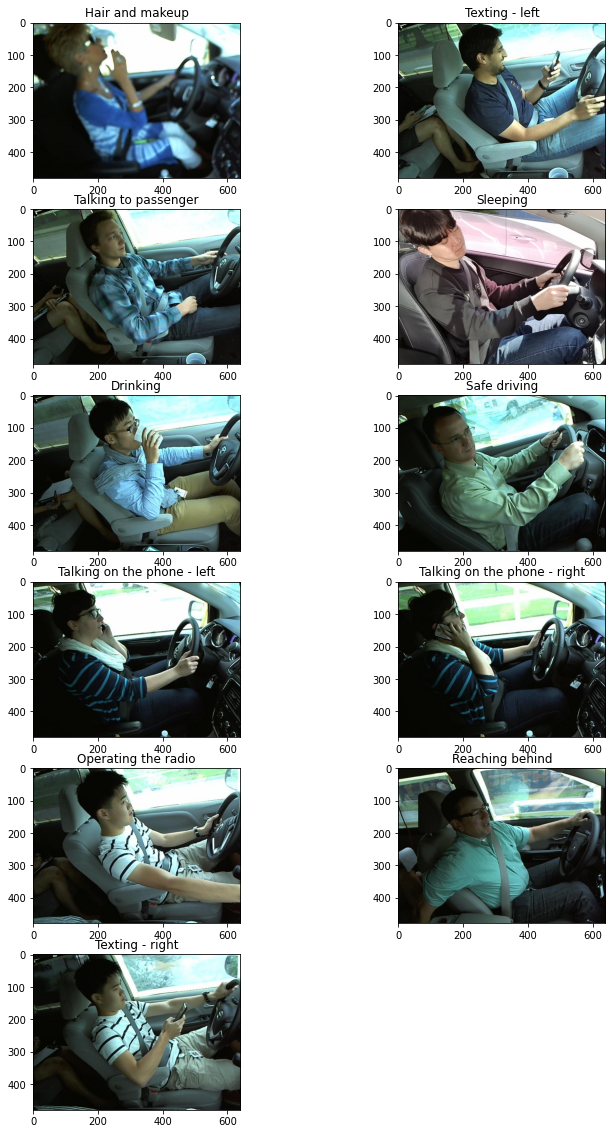

In [6]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger',
                'c10': 'Sleeping'}
plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = './imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(6, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

In [7]:
from __future__ import print_function
from __future__ import division
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import pandas as pd
import os, fnmatch, copy, time
import numpy as np
import math
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models
from torchvision import transforms as T
from torch.optim.lr_scheduler import StepLR
from datetime import datetime
from PIL import Image
from torch.utils.data import DataLoader

In [14]:
from torchvision import transforms as T
from torch.utils import data

# multi-GPU 시스템에서 pytorch를 실행할 경우 하나의 GPU에서 코드가 실행되게 프로그래밍을 해도 모든 GPU에 메모리를 할당합니다.
# memory fragmentation 발생 빈도를 줄이기 위해서 아래와 같이 작성합니다.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # GPU 디바이스를 0부터 정렬합니다.
os.environ["CUDA_VISIBLE_DEVICES"]= "1"  # 렙실 서버에 할당된 디바이스 2번째 것을 사용합니다.

# 난수를 예측가능하도록 설정하여 다음에 실행할 시에도 동일한 세트의 난수가 나타나게 됩니다.
random.seed(1)

# 데이터 폴더의 path가 들어오면 대상 폴더에 들어있는 파일들의 path를 반환 해 줍니다.
def get_filepath(dir_root):
    file_paths = []
    # os.walk를 이용하여 하위의 폴더들을 for문으로 탐색할 수 있게 해 줍니다.
    # root : dir과 files가 있는 path
    # dirs : root 아래에 있는 폴더들
    # files : root 아래에 있는 파일들
    for root, dirs, files in os.walk(dir_root):
        # root = ./imgs/train/c1
        for file in files:
            # file = img_13728.jpg
            file_paths.append(os.path.join(root, file))
            # file_paths.append(['./imgs/train/c1/img_13728.jpg'])
    return file_paths

# 우리가 사용하는 이미지 데이터는 하나의 클래스가 하나의 폴더에 대응됩니다. 이러한 구조의 데이터셋을 불러오고 전처리를 진행합니다.
# validation 데이터와 학습데이터가 동일하게 전처리 되도록 설정하였습니다. torch.utils.data 추상 클래스를 인자로 받습니다.
# __getitem__을 필수적으로 overwrite해야 하며, 선택적으로 __len__ 을 overwrite할 수 있습니다만
# 본 클래스에서는 단순히 이미지 파일의 개수를 반환하게 만들었습니다.
class DriverDatasetTrain(data.Dataset):
    def __init__(self, data_root, transforms=None, train=True):
        self.train = train
        # data_root에 있는 파일들의 주소 리스트들을 할당 해 줍니다.
        imgs_in = get_filepath(data_root)
        # 리스트들을 shuffle 해줍니다.
        random.shuffle(imgs_in)
        # 클래스의 파일 개수들을 의미합니다.
        imgs_num = len(imgs_in)
        
        
        if transforms is None:
            # transforms.compose는 이미지 데이터의 전처리, Augmentation등의 과정에서 사용되는 메서드입니다.
            # 하지만 본 클래스에서는 따로 Augmentation을 처리하지는 않고
            # transforms.Resize를 통해 이미지의 크기를 224로 주어 입력데이터로 사용되게 하였습니다.
            # transforms.ToTensor은 이미지를 학습에 이용되는 데이터 형태 Tensor형태로 변환하고 모든 값을 0에서 1사이로 표준화 합니다.
            # 표준화된 값은 Imagenet에서 관행적으로 사용하는 mean=[0.485, 0.456, 0.406] std=[0.229, 0.224, 0.225] 로 정규화 합니다.
            self.transforms = T.Compose([
                                         T.Resize(size = (224, 224)),
                                         T.ToTensor(),
                                         T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                         ])
            
        # train을 True로 설정하였다면 trainset의 해당하는 클래스의 파일 주소 리스트 70%를 할당하고
        # False로 설정하였다면 30%를 할당합니다.
        if self.train:
            self.imgs = imgs_in[:int(0.7 * imgs_num)]
        else:
            self.imgs = imgs_in[int(0.7 * imgs_num):]

    def __getitem__(self, index):
        img_path = self.imgs[index]
        # 불러온 이미지 주소의 폴더 부분 ('c10'과 같은) split하여 label로 저장합니다.
        label = int(img_path.split('/')[-2][1])
        # PIL의 Image.open 함수를 사용하여 이미지를 불러옵니다.
        # 변수의 타입은 <class 'PIL.JpegImagePlugin.JpegImageFIle'>이고
        data = Image.open(img_path)
        # 불러온 이미지를 __init__에서 초기화한 transforms 거쳐 전처리를 진행합니다.
        data = self.transforms(data)
        # 이 이미지가 data가 됩니다.
        return data, label
    
    # 본 클래스에서는 단순히 이미지 파일의 개수를 반환하게 만들었습니다.
    def __len__(self):
        return len(self.imgs)
    
# 테스트에 사용되는 데이터들을 전처리 하기 위해 만들어 주었습니다.
# 세부 내용은 DriverDatasetTrain 클래스와 동일하여 생략하겠습니다.
class DriverDatasetTest(data.Dataset):
    def __init__(self, data_root, transforms=None):

        self.imgs_in = get_filepath(data_root)

        if transforms is None:
            self.transforms = T.Compose([T.Resize(size=(224,224)),
                                         T.ToTensor(),
                                         T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                         ])

    def __getitem__(self, index):
        img_path = self.imgs_in[index]

        data = Image.open(img_path)
        data = self.transforms(data)
        return data, img_path

    def __len__(self):
        return len(self.imgs_in)

In [15]:
# 모델 학습을 위한 함수
def train(model, device, train_loader, optimizer, epoch, train_losses):
    
    # 입력받는 모델을 학습 모드로 설정합니다.
    model.train()
    
    # 앞서 정의했던 train_loader에는 (data, target)형태가 미니 배치 단위로 묶여 있습니다. train_loader에 enumerate()함수를 적용했기 때문에
    # batch_idx, (data, target)형태로 반복 가능한 객체가 생성되어 for문을 실행합니다.
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # data와 target 변수를 사용 중인 장비에 할당합니다.
        data, target = data.to(device), target.to(device)
        
        # 이전 Batchdml Gradient값이 optimizer에 저장되어 있으므로 optimizer를 초기화합니다.
        optimizer.zero_grad()
        
        # 데이터를 모델에 입력하여 output 값을 계산합니다.
        output = model(data)
        
        # 모델에서 계산한 output값인 예측값과 Target 값 사이의 Loss를 계산합니다.
        # 분류 문제에 적합한 CrossEntropyLoss를 사용하였습니다.
        loss = torch.nn.CrossEntropyLoss()(output, target)
        
        # 위에서 계산한 Loss 값을 바탕으로 Back Propagation을 통해 계산한 Gradient값을 각 Parameter에 할당합니다.
        loss.backward()
        
        #각 Parameter에 할당된 Gradient 값을 이용해 모델의 Parameter를 업데이트 합니다.
        optimizer.step()
        
        # 학습을 진행 함에 따라 학습 진행 내용을 출력하도록 구현하였습니다. 임의로 배치사이즈 만큼 지정하였습니다.
        if batch_idx % 63 ==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))
    
    # 학습 진행의 시각화를 위한 train_losses 리스트에 현재의 갖고 있는 train loss의 스칼라 값을 append합니다 
    train_losses.append(loss.item())

In [16]:
# 모델 평가를 위한 함수입니다.
def validation(model, device, vali_loader, vali_losses):
    
    # 입력받은 모델을 평가 모델로 설정합니다.
    model.eval() 
    # 미니 배치별로 Loss를 합산해서 저장할 변수인 vali_loss를 선언하고, 0으로 초기화 합니다.
    vali_loss = 0   
    # 올바르게 예측한 데이터 수를 세는 변수인 correct를 선언하고, 0으로 초기화 합니다.
    correct = 0
    
    # 모델을 평가하는 단계에서는 모델의 Parameter를 업데이트하지 않아야 합니다.
    # with torch.no_grad() 메서드를 이용하여 해당 부분을 실행하는 동안 모델의 Parameter 업데이트를 중단합니다.
    with torch.no_grad():
        # 앞서 학습했던 것과 같이, train_loader에는 (data, target) 형태가 미니 배치단위로 묶여있습니다.
        # for문을 통하여 데이터와 대응하는 Lavel 값에 접근합니다.
        for data, target in vali_loader:
            
            # data와 target 변수를 사용 중인 장비로 할당합니다.
            data, target = data.to(device), target.to(device)
            
            # 데이터를 모델에 입력하여 output값에 계산합니다.
            output = model(data)
            
            # 모델에서 계산한 output 값인 예측값과 target값 사이의 Loss를 계산합니다.
            # 성능 평가 과정에서도 Cross Entropy Loss 함수를 사용합니다.
            vali_loss += F.cross_entropy(output, target, reduction = 'sum').item()
            
            # 모델에 입력된 validation 데이터가 11개의 클래스에 속할 각각의 확률값이 output으로 출력됩니다.
            # 이중 가장 높은 값을 가진 인덱스를 예측값으로 저장합니다.
            # keepdim이 False면 flattened된 값이 반환됩니다.
            # 뒤의 correct를 구할때 사용하기에 tensor구조를 유지하려 True로 설정 해 줍니다.
            pred = output.argmax(dim = 1, keepdim = True)
            
            # target.view_as(pred)를 통해 target tensor구조를 pred Tensor와 같은 모양으로 정렬합니다.
            # view_as() 메서드는 적용 대상 Tensor를 메서드에 입력되는 Tensor의 모양대로 재정렬하는 함수입니다.
            # eq() 메서드는 객체 간의 비교 연산자로, pred.eq(target.view_as(pred))은
            # pred와 target.view_as(pred)의 값이 일치하면 1, 일치하지 않으면 0은 반환합니다.
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    # 모든 미니 배치에서 합한 Loss값을 batch수로 나누어 미니 배치마다 계산된 Loss값의 평균을 구합니다.
    vali_loss/=len(vali_loader.dataset)
    
    # 모든 미니 배치에서 합한 정확도 값을 Batch 수로 나누어 미니 배치마다 계산된 정확도 값의 평균을 구합니다.
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        vali_loss, correct, len(vali_loader.dataset), 100. * correct / len(vali_loader.dataset)))
    
    # 학습 진행의 시각화를 위한 vali_losses 리스트에 현재의 갖고 있는 loss의 스칼라 값을 append합니다
    vali_losses.append(vali_loss)

In [17]:
# 전이학습
# pre-trian에서는 설정한 일부 Layer의 Parameter만을 업데이트 하는 겁니다
# feature_extracting가 True로 설정 되어 있다면 진행합니다.
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        # 미리 학습된 모델의 일부 Layer만 업데이트하도록 설정하는 방법은
        # Parameter를 업데이트를 하지 않을 상위 Layer들의 requires_grad 값을 False로 지정하는 겁니다.
        for param in model.parameters():
            param.requires_grad = False

In [24]:
model_name = ""
num_classes=11
feature_extract=True
use_pretrained=False
def initialize_model(model_name, num_classes=11, feature_extract=True, use_pretrained=False):
    # 모델에 들어갈 파라미터는 모델 별로 다릅니다.
    model_ft = None
    input_size = 0
    
    if model_name == "resnet50":
        """ Resnet50
        """
        # torchvision의 models에서는 ResNet 이외에도 densenet, SQUEEZENET등의
        # 이미지 분류 모델을 불러와 사용할 수 있습니다. pretrained를 True로 설정하면
        # 미리 학습된 모델의 Parameter 값을 그대로 가져오고, False로 설정한다면
        # 모델의 구조 만을 가져오고 , Parameter 값은 랜덤으로 설정됩니다.
        model_ft = models.resnet50(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # fc layer 입력 채널 수를 얻습니다.
        # 코드는 마지막 fc layer를 수정합니다.
        num_ftrs = model_ft.fc.in_features
        # 모델의 fc layer를 원하는 layer로 변경할 수 있습니다.
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
        
    elif model_name == "resnet152":
        """ Resnet152
        """
        model_ft = models.resnet152(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
        
    elif model_name == "resnext101_32x8d":
        """ Resnext101_32x8d
        """
        model_ft = models.resnext101_32x8d(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
        
    elif model_name == "wide_resnet101_2":
        """ Wide_resnet101_2
        """
        model_ft = models.wide_resnet101_2(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
        
    elif model_name == "densenet":
        """ Densenet161
        """
        model_ft = models.densenet161(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224
    
    elif model_name == "squeezenet":
        """ Squeezenet1_1
        """
        model_ft = models.squeezenet1_1(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224
        
    else:
        print("Invalid model name, exiting...")
        exit()
    
    return model_ft, input_size
    
# Initialize the model for this run
# model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=False)

# Print the model we just instantiated
# print(model_ft)

In [19]:
#Hyperparameters
max_epoch = 100 #max_epoch             200
alpha = 0.001 #learning rate           0.001 0.005 0.01 0.05 0.1
bth_size = 64 #batch size             32 64 128 256 512 1024
gam = 0.99 #gamma(discount factor)    0.1 0.5 0.9

In [20]:
train_data_path = './imgs/train'
test_data_path = './imgs/test'

# 위의 클래스 설명 참조
train_data = DriverDatasetTrain(train_data_path, train=True)
# Dataloader는 불러운 이미지 데이터를 주어진 조건에 따라 미니 배치 단위로 분리하는 역할을 수행합니다. 학습 과정에 사용될 Data_loader는
# 위에 라인 train_data를 이용하여 생성합니다. shuffle = True로 설정하면 데이터의 순서가 섞여 모델이 학습 할 때
# Label 정보의 순서를 기억하는 것을 방지할 수 있습니다.
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=bth_size, num_workers=4)


vali_data = DriverDatasetTrain(train_data_path, train=False)
vali_loader = DataLoader(dataset=vali_data, shuffle=False, batch_size=bth_size, num_workers=4)

test_data = DriverDatasetTest(test_data_path)
test_loader = DataLoader(dataset = test_data, shuffle=False, batch_size=1, num_workers=1)


======== Epoch: 1 ========
Train Epoch: 0 [0/17369 (0%)]	Loss: 2.378758
Train Epoch: 0 [3200/17369 (18%)]	Loss: 2.192531
Train Epoch: 0 [6400/17369 (37%)]	Loss: 2.025419
Train Epoch: 0 [9600/17369 (55%)]	Loss: 1.982626
Train Epoch: 0 [12800/17369 (74%)]	Loss: 1.981034
Train Epoch: 0 [16000/17369 (92%)]	Loss: 1.995599

Validation set: Average loss: 1.9600, Accuracy: 2431/7444 (33%)

======== Epoch: 2 ========
Train Epoch: 1 [0/17369 (0%)]	Loss: 1.932237
Train Epoch: 1 [3200/17369 (18%)]	Loss: 2.011945
Train Epoch: 1 [6400/17369 (37%)]	Loss: 1.922192
Train Epoch: 1 [9600/17369 (55%)]	Loss: 1.820949
Train Epoch: 1 [12800/17369 (74%)]	Loss: 1.771945
Train Epoch: 1 [16000/17369 (92%)]	Loss: 1.881953

Validation set: Average loss: 1.8234, Accuracy: 3294/7444 (44%)

======== Epoch: 3 ========
Train Epoch: 2 [0/17369 (0%)]	Loss: 1.870018
Train Epoch: 2 [3200/17369 (18%)]	Loss: 1.927509
Train Epoch: 2 [6400/17369 (37%)]	Loss: 1.721673
Train Epoch: 2 [9600/17369 (55%)]	Loss: 1.879850
Train Epoch

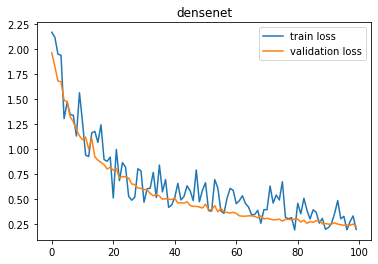

In [25]:
# pre-train Model의 리스트들입니다.
model_list = ["resnet50", "resnet152", "resnext101_32x8d", "wide_resnet101_2", "densenet", "squeezenet"]
# 학습할 pre-train model의 이름을 설정합니다.
model_name = model_list[4]
# fitting할 모델과, input_size를 가져옵니다
model_ft, input_size = initialize_model(model_name, num_classes=11)    # input_size = 224

# CUDA를 통해 GPU를 사용할 수 있다면 'cuda' 아니라면 'cpu'로 설정합니다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 코드 상단에서 지정한 연산 장비로 모델을 올립니다.
model = model_ft.to(device)
# 손실함수를 최소로 하는 가중치를 찾기 위해 Adam 알고리즘의 optimizer를 지정합니다.
optimizer = optim.Adam(model.parameters(), lr = alpha)
# learning rate scheduler로서 StepLR을 사용합니다.
# 일정한 Step 마다 learning rate에 gamma를 곱해주는 방식입니다.
# step_size = 1에 gamma 0.99로 설정하면 1Epoch마다 0.99씩 곱해
# Learning Rate를 감소시킨다는 의미입니다.
scheduler = StepLR(optimizer, step_size = 1, gamma = gam)

train_losses = []
validation_losses = []
# 미리 지정해둔 Epoch 수만큼 반복 학습 for문을 선언해 줍니다.
for epoch in range(max_epoch):
    print("======== Epoch: {} ========".format(epoch + 1))
    train(model, device, train_loader, optimizer, epoch, train_losses)
    validation(model, device, vali_loader, validation_losses)

# 각 에폭당 로스들을 보기위해 시각화 해줍니다.
plt.plot(train_losses, label='train loss')
plt.plot(validation_losses, label='validation loss')
plt.legend()
plt.title(model_name)
plt.show()
#print('Best accuracy of '+model_name+' during training: {:.4f}'.format(test_best_acc))

torch.save(model.state_dict(), "trained.model")

In [22]:
# print(sorted(os.listdir('./imgs/train/c10')))
# !find . -name .DS_Store -print0 | xargs -0 git rm -f --ignore-unmatch
# !echo .DS_Store >> .gitignore
# !rm -r ./imgs/train/c10/.ipynb_checkpoints

In [23]:
# test set 예측을 위한 함수
def predict(model, device, test_loader):
    # 학습을 진행하지 않기 때문에 모델을 평가 모드로 설정합니다.
    model.eval()
    # 출력할 결과물을 담는 리스트
    result = []
    for (data, path) in test_loader:
        path = path[0].split('/')
        # with torch.no_grad() 메서드를 이용하여 해당 부분을 실행하는 동안
        # 모델의 Parameter 업데이트를 중단합니다.
        with torch.no_grad():
            # 데이터를 디바이스에 올리고 모델에 데이터를 넣어 결과값을 출력합니다.
            data = data.to(device)
            y = model(data)
            # 결과값에 softmax()함수를 적용하여 데이터가 각 클래스에 속할 확률을
            # output값을 출력합니다.
            output = nn.Softmax(dim = 1)(y)[0].cpu().numpy()
            temp = []
            # ex) temp ['img_14818']
            temp.append(path[-1])
            for j in range(11):
                # ex) temp ['img_14818', 0.06497179]
                temp.append(output[j])
            # ex) result[[img_42790.jpg,0.038854126,0.070724525,0.20158093,0.014635795,0.055806804,0.12244518,0.17548916,0.011011704,0.13800822,0.17144357]]
            result.append(temp)
    
    df_ = pd.DataFrame(result, columns = ['img', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10'])
    df_.to_csv("result.csv", index=False)

In [ ]:
#model, input_size = initialize_model("densenet", num_classes=10)
#model = model_ft.to(device)
#model.load_state_dict(torch.load("trained.model"))
predict(model, device, test_loader)